In [10]:
# SECTION 1 — Import des librairies & chargement du dataset
# numpy et pandas pour la manipulation de données
# matplotlib et seaborn pour les visualisations statiques
# plotly.express pour les visualisations interactives

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Paramètres d'affichage
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Chargement du dataset Netflix
df = pd.read_csv("../data/netflix_titles.csv")

# Affichage des 5 premiers titres
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# SECTION 2 — Exploration initiale du dataset

# Dimension du dataset : nombre de lignes et colonnes
print("Dimensions du dataset :", df.shape, "\n")

# Liste des colonnes
print("Colonnes du dataset :", list(df.columns), "\n")

# Infos du dataset : types de données, valeurs non nulles
print("Infos du dataset :")
df.info()

# Valeurs manquantes par colonne
print("\nValeurs manquantes :")
print(df.isna().sum(), "\n")

# Vérification des doublons
print("Duplicats :", df.duplicated().sum())

Dimensions du dataset : (8807, 12) 

Colonnes du dataset : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'] 

Infos du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Valeurs manquantes :
show_id   

Valeurs manquantes après nettoyage :
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


C:\Users\Elliote\AppData\Local\Temp\ipykernel_50756\2852293433.py:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



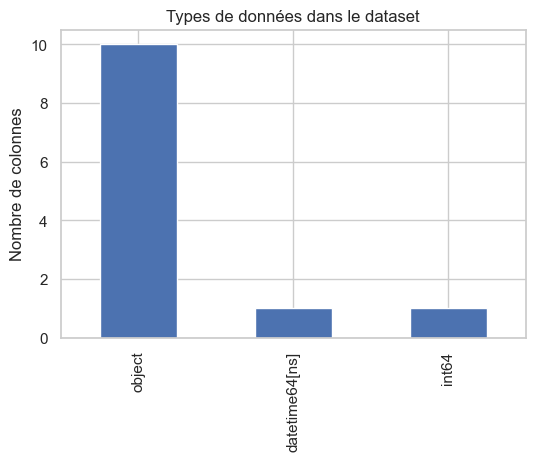

In [12]:
# SECTION 3 — Nettoyage du dataset

# Remplissage des NaN par "Unknown" pour certaines colonnes
cols_a_remplir = ["director", "cast", "country", "rating", "duration"]
df[cols_a_remplir] = df[cols_a_remplir].fillna("Unknown")

# Conversion de la colonne 'date_added' en datetime
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Retrait des espaces au début et à la fin des chaînes
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Vérification des valeurs manquantes après nettoyage
print("Valeurs manquantes après nettoyage :")
print(df.isna().sum())

# Graphique des types de données
df.dtypes.value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Types de données dans le dataset")
plt.ylabel("Nombre de colonnes")
plt.show()

C:\Users\Elliote\AppData\Local\Temp\ipykernel_50756\473661797.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




type
Movie      6131
TV Show    2676
Name: count, dtype: int64 

Proportions (%) :
type
Movie      69.62
TV Show    30.38
Name: count, dtype: float64


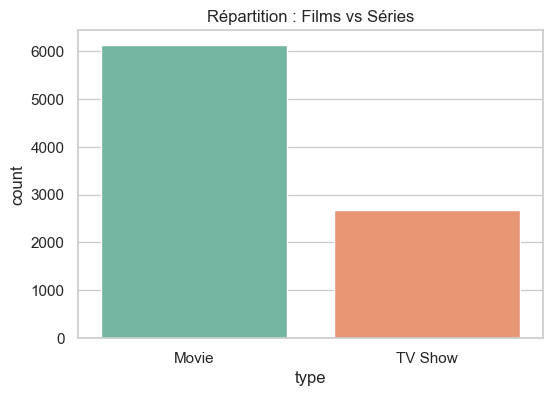

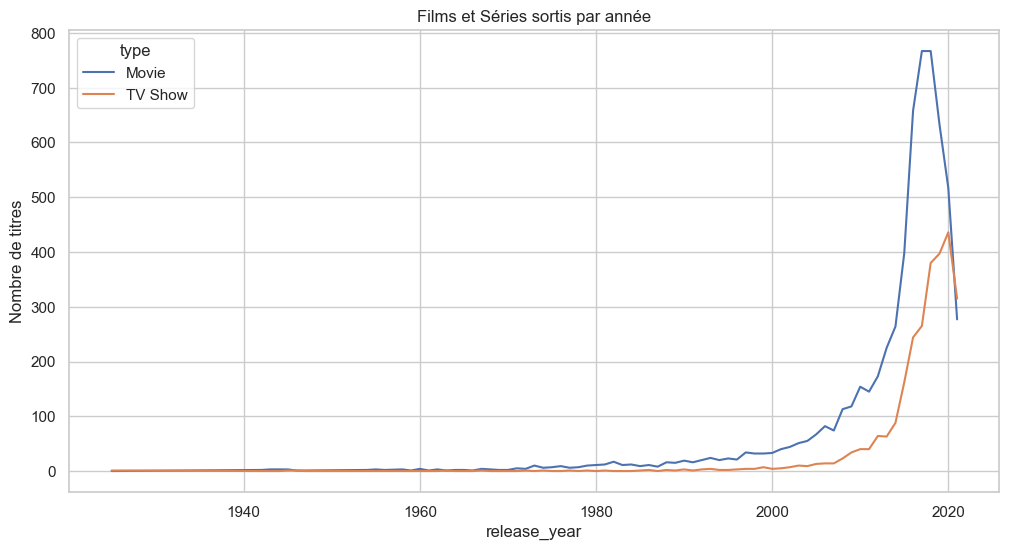

type          Movie  TV Show  Total
release_year                       
1925              0        1      1
1942              2        0      2
1943              3        0      3
1944              3        0      3
1945              3        1      4
...             ...      ...    ...
2017            767      265   1032
2018            767      380   1147
2019            633      397   1030
2020            517      436    953
2021            277      315    592

[74 rows x 3 columns]


In [13]:
# SECTION 4.1 — Films vs Séries

# Nombre de films et séries
type_counts = df["type"].value_counts()
print(type_counts, "\n")

# Proportion en pourcentage
print("Proportions (%) :")
print(round(type_counts / len(df) * 100, 2))

# Bar chart films et séries
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Répartition : Films vs Séries")
plt.show()

#Line chart temporel du nombre de films et de series sortis par annee

df_year_type = df.groupby(["release_year", "type"])["show_id"].count().unstack(fill_value=0)

df_year_type.plot(figsize=(12,6))
plt.title("Films et Séries sortis par année")
plt.ylabel("Nombre de titres")
plt.show()

df_year_type["Total"] = df_year_type.sum(axis=1)
print(df_year_type)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64


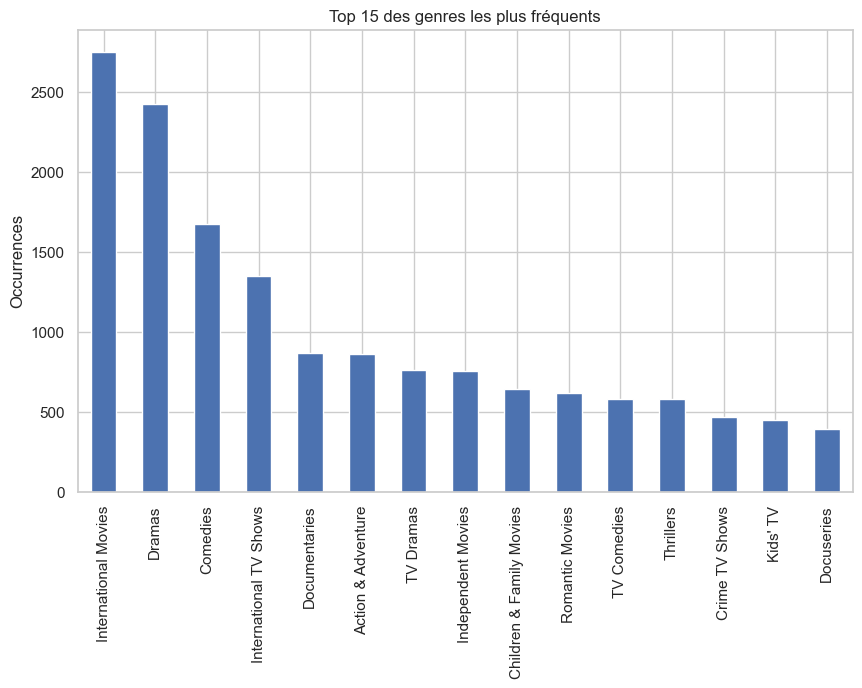

In [14]:
# SECTION 4.2 — Analyse des genres

#15 genres les plus frequents
genres = df['listed_in'].str.split(", ", expand=True).stack()
genre_counts = genres.value_counts()

print(genre_counts.head(15))

#Bar chart des 15 genres les plus frequents
plt.figure(figsize=(10,6))
genre_counts.head(15).plot(kind="bar")
plt.title("Top 15 des genres les plus fréquents")
plt.ylabel("Occurrences")
plt.show()

top15 = genre_counts.head(15).reset_index()
top15.columns = ["Genre", "Occurrences"]

fig = px.pie(
    top15,
    values="Occurrences",
    names="Genre",
    title="Répartition des 15 genres les plus fréquents"
)

fig.show()

United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Name: count, dtype: int64


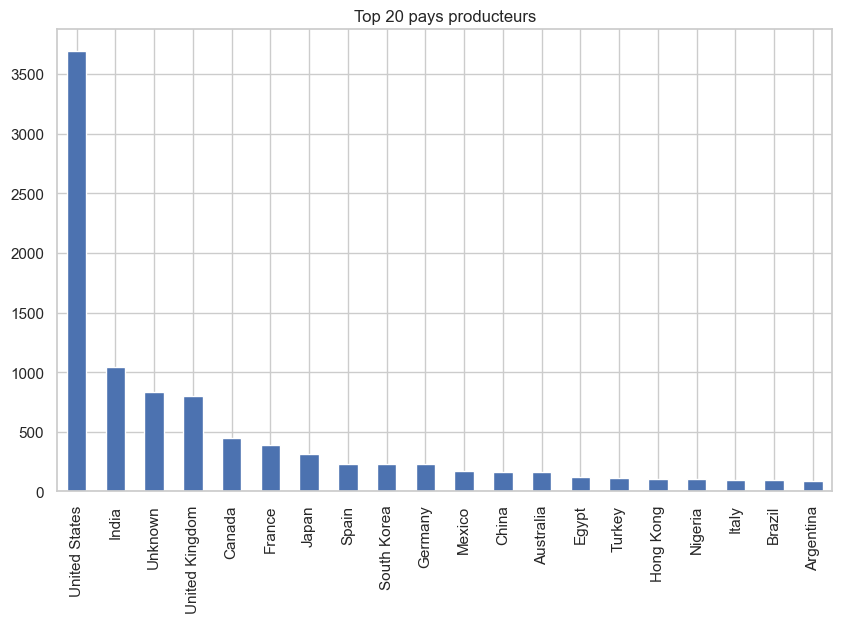

C:\Users\Elliote\AppData\Local\Temp\ipykernel_50756\1773947175.py:27: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [15]:
# SECTION 4.3 — Analyse géographique

#20 pays qui ont le plus produit
countries = df['country'].str.split(", ", expand=True).stack()
country_counts = countries.value_counts()

print(country_counts.head(20))


#Bar chart des pays qui ont le plus produit
plt.figure(figsize=(10,6))
country_counts.head(20).plot(kind="bar")
plt.title("Top 20 pays producteurs")
plt.show()

px.bar(country_counts.head(20), title="Top 20 pays producteurs (Plotly)").show()

all_countries = df['country'].dropna().str.split(", ", expand=True).stack()
all_country_counts = all_countries.value_counts().reset_index()
all_country_counts.columns = ["country", "count"]

all_country_counts['log_count'] = np.log1p(all_country_counts['count'])  # log(1 + count) pour éviter log(0)

top20_df = country_counts.head(20).reset_index()
top20_df.columns = ["country", "count"]

fig = px.choropleth(
    top20_df,
    locations="country",         # noms des pays
    locationmode="country names",
    color="count",
    hover_name="country",
    color_continuous_scale="Viridis",
    title="Top 20 des pays producteurs (Carte interactive)"
)

fig.show()
#Carte interactive avec plotly

Top 20 réalisateurs :
Unknown                2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Martin Scorsese          12
Jay Chapman              12
Steven Spielberg         11
Don Michael Paul         10
Yılmaz Erdoğan            9
David Dhawan              9
Shannon Hartman           9
Anurag Kashyap            9
Lance Bangs               8
Robert Rodriguez          8
Hanung Bramantyo          8
Name: count, dtype: int64


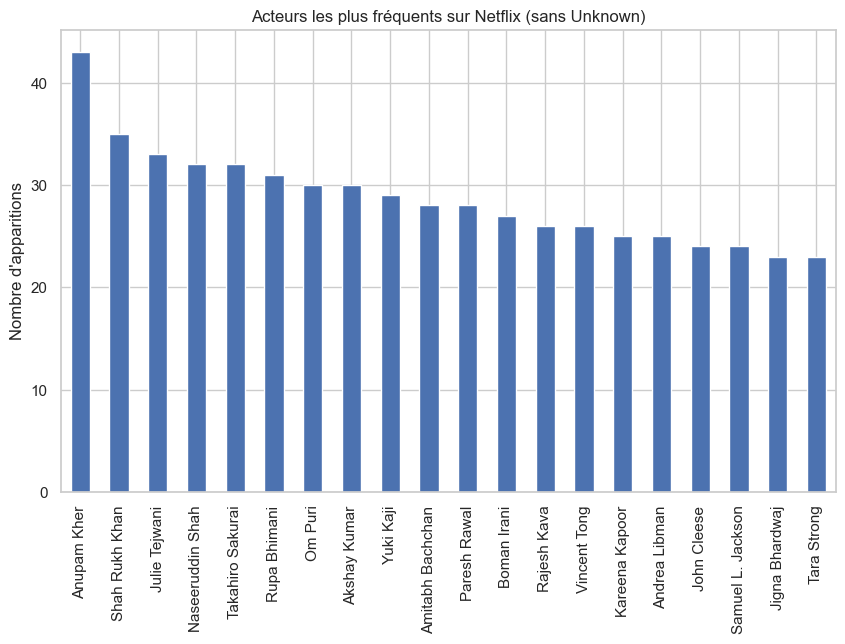

In [16]:
# SECTION 4.4 — Réalisateurs et acteurs

# Réalisateurs
directors = df['director'].str.split(", ", expand=True).stack()
director_counts = directors.value_counts()

print("Top 20 réalisateurs :")
print(director_counts.head(20))

# Acteurs
actors = df['cast'].str.split(", ", expand=True).stack()
actor_counts = actors.value_counts()

# Supprimer les "Unknown" du graphique, car il y en a trop
actor_counts_filtered = actor_counts.drop("Unknown", errors="ignore").head(20)

# Affichage graphique
plt.figure(figsize=(10,6))
actor_counts_filtered.plot(kind="bar")
plt.title("Acteurs les plus fréquents sur Netflix (sans Unknown)")
plt.ylabel("Nombre d'apparitions")
plt.show()

#Comparer réalisateurs films vs séries si pertinent?

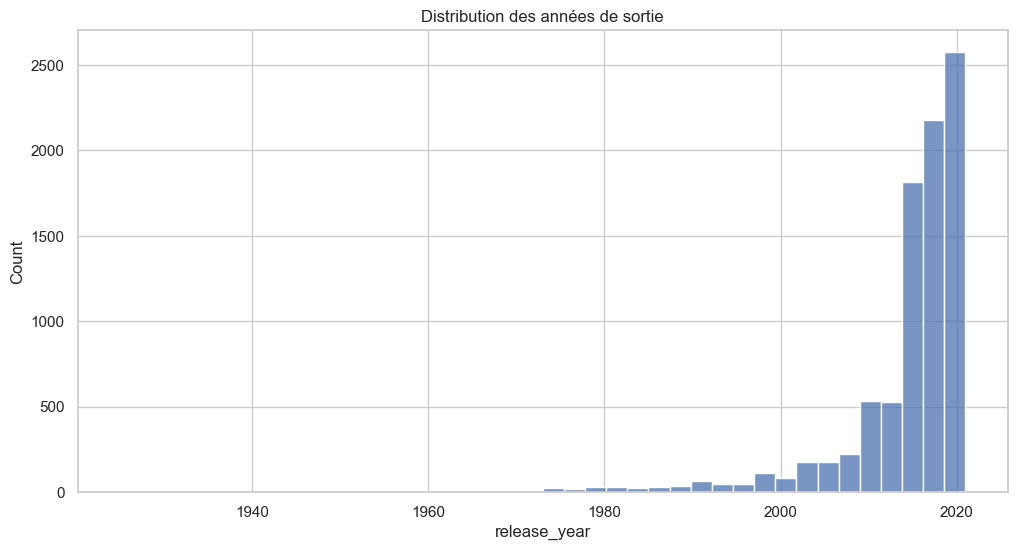

In [17]:
# Histogramme des années de sortie

plt.figure(figsize=(12,6))
sns.histplot(df["release_year"], bins=40)
plt.title("Distribution des années de sortie")
plt.show()

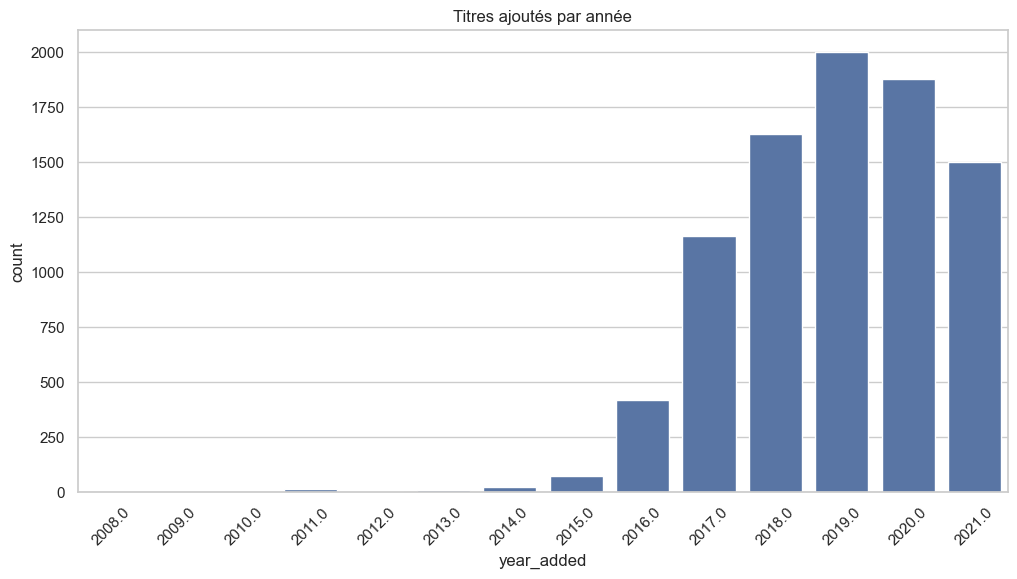

In [18]:
# Bar chart des titres ajoutés par année sur Netflix

df["year_added"] = df["date_added"].dt.year

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="year_added", order=sorted(df["year_added"].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Titres ajoutés par année")
plt.show()